In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')
#from __future__ import absolute_import, print_function,division, unicode_literals
import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [ ]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
data_dir =""
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Bacterialblight','Blast','Brownspot','Tungro'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Bacterialblight' 'Blast' 'Brownspot' 'Tungro']


In [ ]:
train_path = '/content/drive/MyDrive/Rice_newmerge/train'
test_path = '/content/drive/MyDrive/Rice_newmerge/val'

In [ ]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                  #  shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               shuffle=False,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 4745 images belonging to 4 classes.
Found 1187 images belonging to 4 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

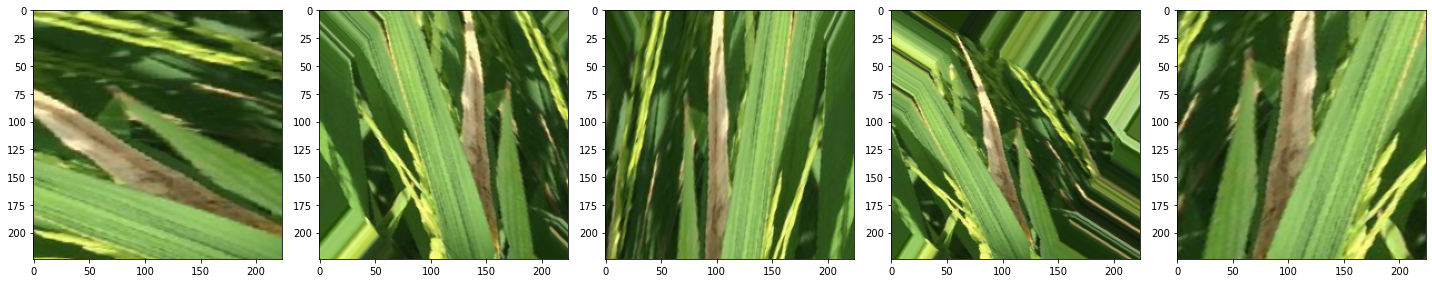

In [ ]:
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)


In [ ]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG19(include_top=False,
                   input_shape=(224,224,3),
                   pooling='None',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(4, activation='softmax'))

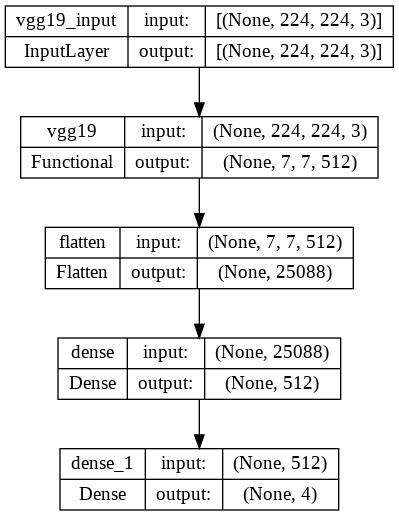

In [ ]:
plot_model(vgg_model,show_shapes= True)

In [ ]:
vgg_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'    ])

history = vgg_model.fit(train_data_gen, validation_data=val_data_gen, epochs=40)

Epoch 1/40
594/594 [==============================] - 93s 156ms/step - loss: 0.8639 - accuracy: 0.7016 - val_loss: 0.4914 - val_accuracy: 0.7607
Epoch 2/40
594/594 [==============================] - 89s 150ms/step - loss: 0.4263 - accuracy: 0.8301 - val_loss: 0.3220 - val_accuracy: 0.8913
Epoch 3/40
594/594 [==============================] - 104s 176ms/step - loss: 0.3948 - accuracy: 0.8478 - val_loss: 0.2746 - val_accuracy: 0.8972
Epoch 4/40
594/594 [==============================] - 94s 158ms/step - loss: 0.3526 - accuracy: 0.8658 - val_loss: 0.2022 - val_accuracy: 0.9250
Epoch 5/40
594/594 [==============================] - 90s 152ms/step - loss: 0.3304 - accuracy: 0.8677 - val_loss: 0.1489 - val_accuracy: 0.9436
Epoch 6/40
594/594 [==============================] - 88s 149ms/step - loss: 0.3139 - accuracy: 0.8805 - val_loss: 0.2088 - val_accuracy: 0.9334
Epoch 7/40
594/594 [==============================] - 88s 148ms/step - loss: 0.2694 - accuracy: 0.8919 - val_loss: 0.2198 - val_a

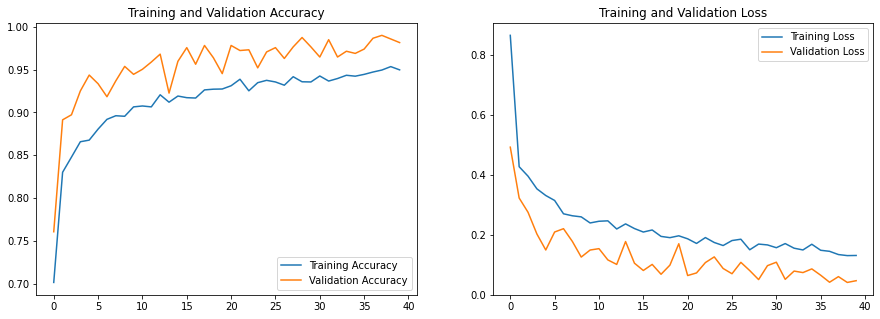

In [ ]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred_res = vgg_model.predict_generator(val_data_gen,val_data_gen.samples//8+1)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(val_data_gen.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['Bacterialblight','Blast','Brownspot','Tungro']
class_rep_res = classification_report(val_data_gen.classes, y_pred_res, target_names=target_names)
print(class_rep_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[312   2   3   0]
 [  4 271  13   0]
 [  0   0 320   0]
 [  0   0   0 262]]
Classification Report
                 precision    recall  f1-score   support

Bacterialblight       0.99      0.98      0.99       317
          Blast       0.99      0.94      0.97       288
      Brownspot       0.95      1.00      0.98       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           0.98      1187
      macro avg       0.98      0.98      0.98      1187
   weighted avg       0.98      0.98      0.98      1187



**Inception Model**

In [ ]:
inception_model = Sequential()

pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(299,299,3),
                   pooling='None',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

inception_model.add(pretrained_model)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
inception_model.add(Flatten())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dense(4, activation='softmax'))

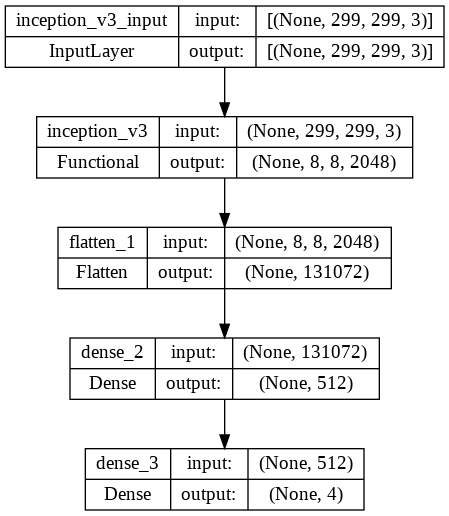

In [ ]:
plot_model(inception_model,show_shapes= True)

In [ ]:
inception_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = inception_model.fit(train_data_gen, validation_data=val_data_gen, epochs=40)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
594/594 [==============================] - 4131s 7s/step - loss: 4.0047 - accuracy: 0.7920 - val_loss: 0.8937 - val_accuracy: 0.8677
Epoch 2/40
594/594 [==============================] - 119s 200ms/step - loss: 0.4305 - accuracy: 0.8851 - val_loss: 0.1894 - val_accuracy: 0.9292
Epoch 3/40
594/594 [==============================] - 118s 198ms/step - loss: 0.2482 - accuracy: 0.9187 - val_loss: 0.1392 - val_accuracy: 0.9545
Epoch 4/40
594/594 [==============================] - 115s 194ms/step - loss: 0.2050 - accuracy: 0.9286 - val_loss: 0.1375 - val_accuracy: 0.9520
Epoch 5/40
594/594 [==============================] - 116s 196ms/step - loss: 0.1774 - accuracy: 0.9340 - val_loss: 0.1164 - val_accuracy: 0.9587
Epoch 6/40
594/594 [==============================] - 115s 194ms/step - loss: 0.1928 - accuracy: 0.9336 - val_loss: 0.1143 - val_accuracy: 0.9612
Epoch 7/40
594/594 [==============================] - 116s 196ms/step - loss: 0.1857 - accuracy: 0.9370 - val_loss: 0.0841 - v

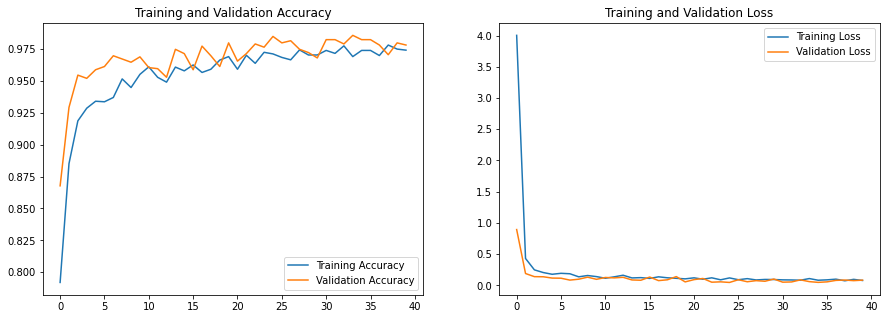

In [ ]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred_res = inception_model.predict_generator(val_data_gen,val_data_gen.samples//8+1)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(val_data_gen.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['Bacterialblight','Blast','Brownspot','Tungro']
class_rep_res = classification_report(val_data_gen.classes, y_pred_res, target_names=target_names)
print(class_rep_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[314   3   0   0]
 [  1 287   0   0]
 [  1  21 298   0]
 [  0   0   0 262]]
Classification Report
                 precision    recall  f1-score   support

Bacterialblight       0.99      0.99      0.99       317
          Blast       0.92      1.00      0.96       288
      Brownspot       1.00      0.93      0.96       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           0.98      1187
      macro avg       0.98      0.98      0.98      1187
   weighted avg       0.98      0.98      0.98      1187



In [ ]:
inception_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 88,914,212
Trainable params: 67,111,428
Non-trainable params: 21,802,784
_________________________________________________________________


**Custom Model**

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

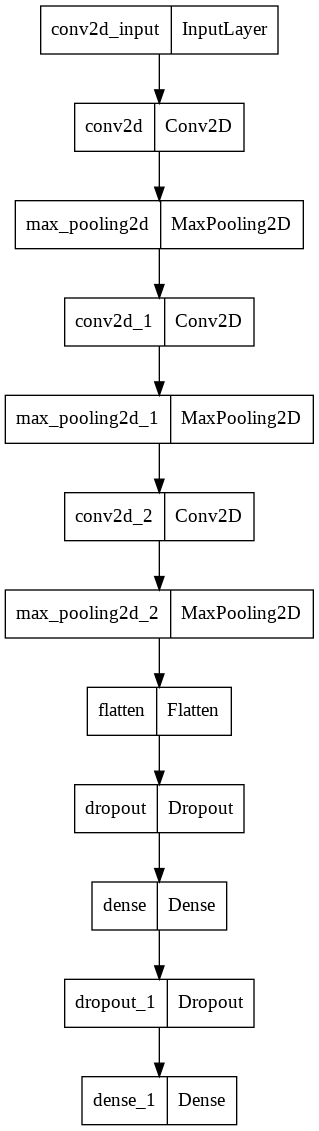

In [ ]:
plot_model(model)

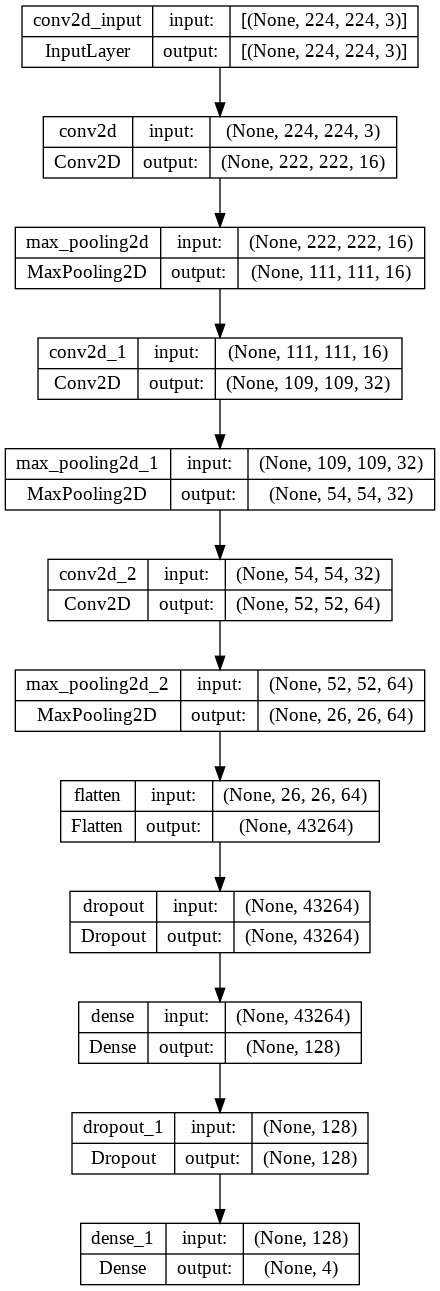

In [ ]:
plot_model(model,show_shapes= True)

In [ ]:
EPOCHS=40
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
594/594 [==============================] - 1249s 2s/step - loss: 0.9375 - accuracy: 0.6280 - val_loss: 0.5759 - val_accuracy: 0.7751
Epoch 2/40
594/594 [==============================] - 69s 116ms/step - loss: 0.5991 - accuracy: 0.7766 - val_loss: 0.3918 - val_accuracy: 0.8382
Epoch 3/40
594/594 [==============================] - 69s 116ms/step - loss: 0.4590 - accuracy: 0.8251 - val_loss: 0.2884 - val_accuracy: 0.8871
Epoch 4/40
594/594 [==============================] - 68s 115ms/step - loss: 0.3795 - accuracy: 0.8525 - val_loss: 0.3000 - val_accuracy: 0.8762
Epoch 5/40
594/594 [==============================] - 68s 115ms/step - loss: 0.3575 - accuracy: 0.8527 - val_loss: 0.3076 - val_accuracy: 0.8804
Epoch 6/40
594/594 [==============================] - 68s 114ms/step - loss: 0.3063 - accuracy: 0.8818 - val_loss: 0.2786 - val_accuracy: 0.9031
Epoch 7/40
594/594 [==============================] - 68s 115ms/step - loss: 0.2866 - accuracy: 0.8919 - val_loss: 0.1457 - val_acc

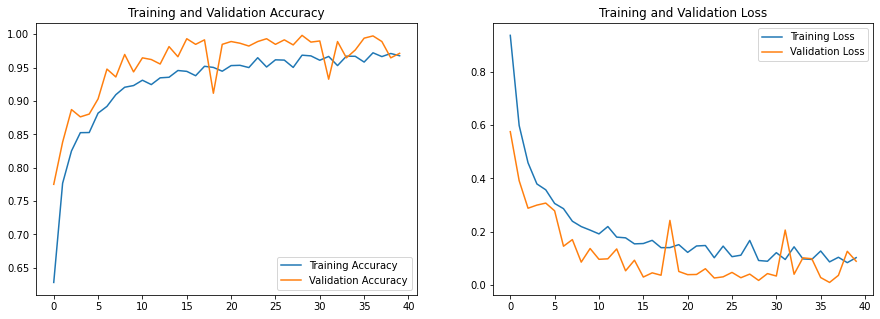

In [ ]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred_res = model.predict_generator(val_data_gen,val_data_gen.samples//8+1)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(val_data_gen.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['Bacterialblight','Blast','Brownspot','Tungro']
class_rep_res = classification_report(val_data_gen.classes, y_pred_res, target_names=target_names)
print(class_rep_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[317   0   0   0]
 [ 33 254   1   0]
 [  0   0 320   0]
 [  0   0   0 262]]
Classification Report
                 precision    recall  f1-score   support

Bacterialblight       0.91      1.00      0.95       317
          Blast       1.00      0.88      0.94       288
      Brownspot       1.00      1.00      1.00       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           0.97      1187
      macro avg       0.98      0.97      0.97      1187
   weighted avg       0.97      0.97      0.97      1187



**resnet**

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))


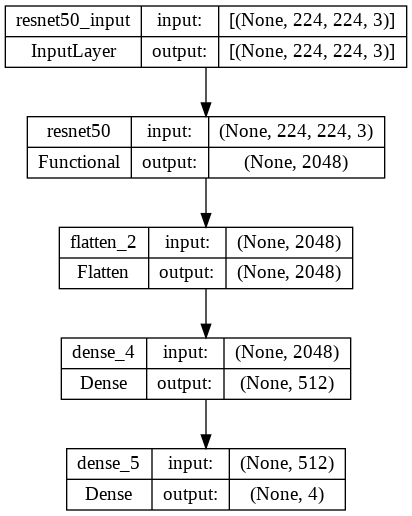

In [ ]:
plot_model(resnet_model,show_shapes= True)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_data_gen, validation_data=val_data_gen, epochs=40)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
594/594 [==============================] - 4098s 7s/step - loss: 1.2715 - accuracy: 0.4251 - val_loss: 1.1863 - val_accuracy: 0.4027
Epoch 2/40
594/594 [==============================] - 84s 142ms/step - loss: 1.1766 - accuracy: 0.4790 - val_loss: 1.0888 - val_accuracy: 0.5198
Epoch 3/40
594/594 [==============================] - 80s 135ms/step - loss: 1.1334 - accuracy: 0.5104 - val_loss: 1.1483 - val_accuracy: 0.4810
Epoch 4/40
594/594 [==============================] - 81s 137ms/step - loss: 1.0953 - accuracy: 0.5410 - val_loss: 1.0695 - val_accuracy: 0.5029
Epoch 5/40
594/594 [==============================] - 80s 135ms/step - loss: 1.0681 - accuracy: 0.5439 - val_loss: 0.9910 - val_accuracy: 0.5864
Epoch 6/40
594/594 [==============================] - 78s 131ms/step - loss: 1.0511 - accuracy: 0.5572 - val_loss: 0.9736 - val_accuracy: 0.6209
Epoch 7/40
594/594 [==============================] - 80s 135ms/step - loss: 1.0307 - accuracy: 0.5633 - val_loss: 0.9428 - val_acc

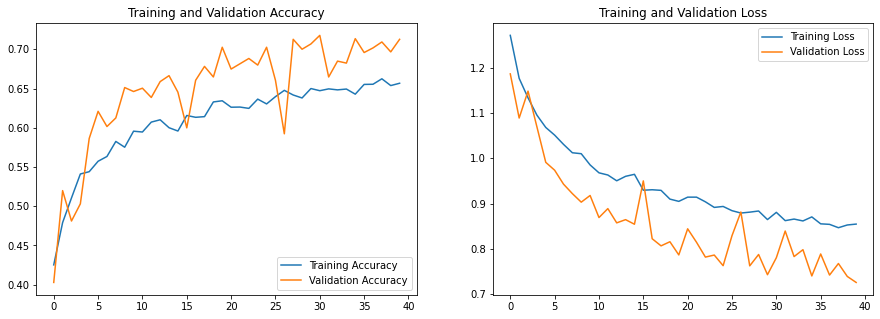

In [ ]:
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred_res = resnet_model.predict_generator(val_data_gen,val_data_gen.samples//8+1)
y_pred_res = np.argmax(Y_pred_res, axis=1)
print('Confusion Matrix')
conf_matrix_res = confusion_matrix(val_data_gen.classes, y_pred_res)
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['Bacterialblight','Blast','Brownspot','Tungro']
class_rep_res = classification_report(val_data_gen.classes, y_pred_res, target_names=target_names)
print(class_rep_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[238  24  15  40]
 [ 70 101  65  52]
 [ 26   7 256  31]
 [  5   6   0 251]]
Classification Report
                 precision    recall  f1-score   support

Bacterialblight       0.70      0.75      0.73       317
          Blast       0.73      0.35      0.47       288
      Brownspot       0.76      0.80      0.78       320
         Tungro       0.67      0.96      0.79       262

       accuracy                           0.71      1187
      macro avg       0.72      0.71      0.69      1187
   weighted avg       0.72      0.71      0.69      1187



In [ ]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='None',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:

vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(4, activation='softmax'))

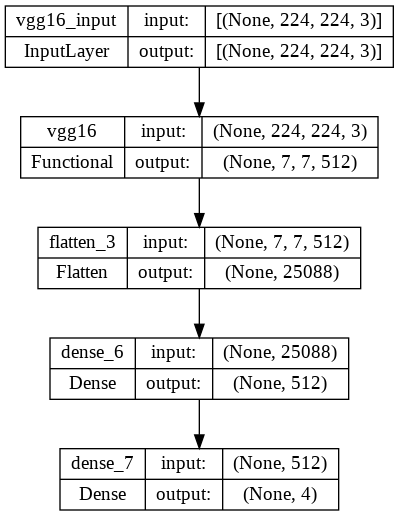

In [ ]:
plot_model(vgg_model,show_shapes= True)